

## Research Questions:

1. Which degrees have the highest starting salaries? 


2. Which majors have the lowest earnings after college?


3. Which degrees have the highest earning potential?


4. What are the lowest risk college majors from an earnings standpoint?


5. Do business, STEM (Science, Technology, Engineering, Mathematics) or HASS (Humanities, Arts, Social Science) degrees earn more on average?


In [65]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [334]:
df =  pd.read_csv('salaries-by-college-major.csv')

In [335]:
df.tail(5)

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
46,Psychology,35900.0,60400.0,31600.0,127000.0,HASS
47,Religion,34100.0,52000.0,29700.0,96400.0,HASS
48,Sociology,36500.0,58200.0,30700.0,118000.0,HASS
49,Spanish,34000.0,53100.0,31000.0,96400.0,HASS
50,Source: PayScale Inc.,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In [41]:
def check(df):
    print("Shape". center(82,'~'))
    print("Rows:{}".format(df.shape[0]))
    print("Columns:{}".format(df.shape[1]))
    print("Data Type". center(82,'~'))
    print(df.dtypes)
    print("Null Values". center(82,'~'))
    print(df.isnull().sum())
    print("Percentage Null Values". center(82,'~'))
    print((df.isnull().mean()*100).round(2))
    print("Duplicates". center(82,'~'))
    print(df.duplicated().sum())

check(df)



def check_variable(df):
    nunique_df = pd.DataFrame({'Variable':df.columns, 'Classes':[f'{df[i].nunique()} labels' for i in df.columns]})
    nunique_df = nunique_df.sort_values('Classes', ascending = False)
    nunique_df = nunique_df.reset_index(drop =True)
    return nunique_df
check_variable(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Shape~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows:51
Columns:6
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Data Type~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Undergraduate Major                   object
Starting Median Salary               float64
Mid-Career Median Salary             float64
Mid-Career 10th Percentile Salary    float64
Mid-Career 90th Percentile Salary    float64
Group                                 object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Null Values~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Undergraduate Major                  0
Starting Median Salary               1
Mid-Career Median Salary             1
Mid-Career 10th Percentile Salary    1
Mid-Career 90th Percentile Salary    1
Group                                1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Percentage Null Values~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Undergraduate Major                  0.00
Starting Median Salary               1.96
Mid-Career Median Salary           

,Variable,Classes
0,Undergraduate Major,51 labels
1,Mid-Career Median Salary,49 labels
2,Mid-Career 10th Percentile Salary,45 labels
3,Starting Median Salary,43 labels
4,Mid-Career 90th Percentile Salary,43 labels
5,Group,3 labels


Dealing With Missing Data
There's missing data in 5 of the 6 columns, however because the missing data is less than 2% of the data points in each of the columns, we can drop the affected rows as it will not have any effect on the analysis.

In [170]:
clean_df = df.dropna()
clean_df.isnull().sum()

Undergraduate Major                  0
Starting Median Salary               0
Mid-Career Median Salary             0
Mid-Career 10th Percentile Salary    0
Mid-Career 90th Percentile Salary    0
Group                                0
dtype: int64

In [135]:
clean_df['Starting Median Salary'].mode()
# clean_df['Starting Median Salary'].value_counts().head(5)


0    35900.0
Name: Starting Median Salary, dtype: float64

<AxesSubplot: >

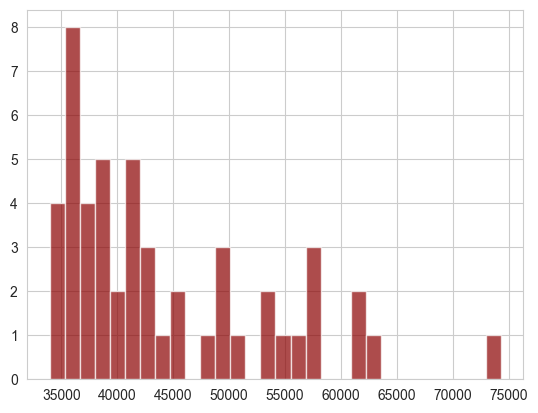

In [91]:
sms = clean_df['Starting Median Salary']
sms.hist(bins=30, color='darkred', alpha=0.7)



The starting median salaries are not normally distributed. The starting median salary of $35,900.00 occured the highest number of times. It is the same for Psychology Music and Drama.

#### Exploring The Career Group Types

In [60]:
clean_df['Group'].value_counts()

HASS        22
STEM        16
Business    12
Name: Group, dtype: int64

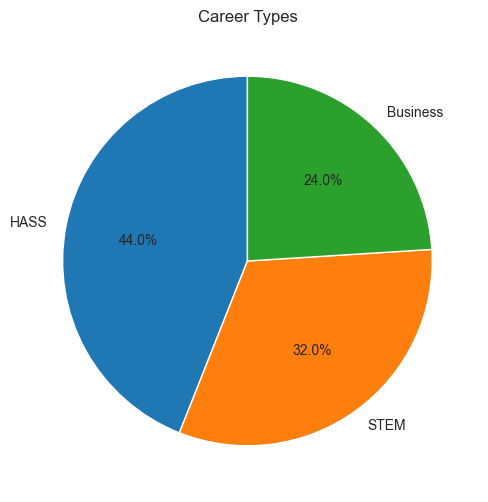

In [70]:
# labels = ['HASS','STEM','Business']
# values = [22, 16, 12]

sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.pie(clean_df['Group'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Career Types')

plt.show()

## 1. Which degrees have the highest starting salaries?

In [47]:
clean_df.head(4)

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,46000.0,77100.0,42200.0,152000.0,Business
1,Aerospace Engineering,57700.0,101000.0,64300.0,161000.0,STEM
2,Agriculture,42600.0,71900.0,36300.0,150000.0,Business
3,Anthropology,36800.0,61500.0,33800.0,138000.0,HASS


In [136]:
clean_df.sort_values('Starting Median Salary', ascending=False).head(5)

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
43,Physician Assistant,74300.0,91700.0,66400.0,124000.0,STEM
8,Chemical Engineering,63200.0,107000.0,71900.0,194000.0,STEM
12,Computer Engineering,61400.0,105000.0,66100.0,162000.0,STEM
19,Electrical Engineering,60900.0,103000.0,69300.0,168000.0,STEM
38,Mechanical Engineering,57900.0,93600.0,63700.0,163000.0,STEM


The degree with the highest starting salary of $74,300 is Physician Assistant.

#### *What college major has the highest mid-career salary? How much do graduates with this major earn? (Mid-career is defined as having 10+ years of experience).

In [137]:
clean_df.sort_values('Mid-Career Median Salary', ascending=False).head(5)

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
8,Chemical Engineering,63200.0,107000.0,71900.0,194000.0,STEM
12,Computer Engineering,61400.0,105000.0,66100.0,162000.0,STEM
19,Electrical Engineering,60900.0,103000.0,69300.0,168000.0,STEM
1,Aerospace Engineering,57700.0,101000.0,64300.0,161000.0,STEM
17,Economics,50100.0,98600.0,50600.0,210000.0,Business


In [143]:
clean_df.loc[clean_df['Mid-Career Median Salary'].idxmax()]

Undergraduate Major                  Chemical Engineering
Starting Median Salary                            63200.0
Mid-Career Median Salary                         107000.0
Mid-Career 10th Percentile Salary                 71900.0
Mid-Career 90th Percentile Salary                194000.0
Group                                                STEM
Name: 8, dtype: object

The college major with the highest mid-career salary is Chemical Engineering. Graduate with this major earn $107,000

## 2. Which majors have the lowest earnings after college?

#### * Which college major has the lowest starting salary and how much do graduates earn after university?

In [139]:
clean_df.sort_values('Starting Median Salary', ascending=False).tail(5)

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
34,Journalism,35600.0,66700.0,38400.0,145000.0,HASS
15,Criminal Justice,35000.0,56300.0,32200.0,107000.0,HASS
18,Education,34900.0,52000.0,29300.0,102000.0,HASS
47,Religion,34100.0,52000.0,29700.0,96400.0,HASS
49,Spanish,34000.0,53100.0,31000.0,96400.0,HASS


In [145]:
clean_df.loc[clean_df['Starting Median Salary'].idxmin()]

Undergraduate Major                  Spanish
Starting Median Salary               34000.0
Mid-Career Median Salary             53100.0
Mid-Career 10th Percentile Salary    31000.0
Mid-Career 90th Percentile Salary    96400.0
Group                                   HASS
Name: 49, dtype: object

The college major with the lowest starting salary is Spanish. Graduate with this major earn $34,000.

#### * Which college major has the lowest mid-career salary and how much can people expect to earn with this degree? 


In [153]:
clean_df.sort_values('Mid-Career Median Salary', ascending=False).tail(5)

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
39,Music,35900.0,55000.0,26700.0,134000.0,HASS
32,Interior Design,36100.0,53200.0,35700.0,107000.0,HASS
49,Spanish,34000.0,53100.0,31000.0,96400.0,HASS
18,Education,34900.0,52000.0,29300.0,102000.0,HASS
47,Religion,34100.0,52000.0,29700.0,96400.0,HASS


In [144]:
clean_df.loc[clean_df['Mid-Career Median Salary'].idxmin()]

Undergraduate Major                  Education
Starting Median Salary                 34900.0
Mid-Career Median Salary               52000.0
Mid-Career 10th Percentile Salary      29300.0
Mid-Career 90th Percentile Salary     102000.0
Group                                     HASS
Name: 18, dtype: object

The college major with the lowest mid-career salary are Education and Religion. Graduate with this majors earn $52,000

## 3. Which degrees have the highest earning potential?
Degrees with the highest earning potential are degrees with the highest Mid-Career 90th Percentile Salary.


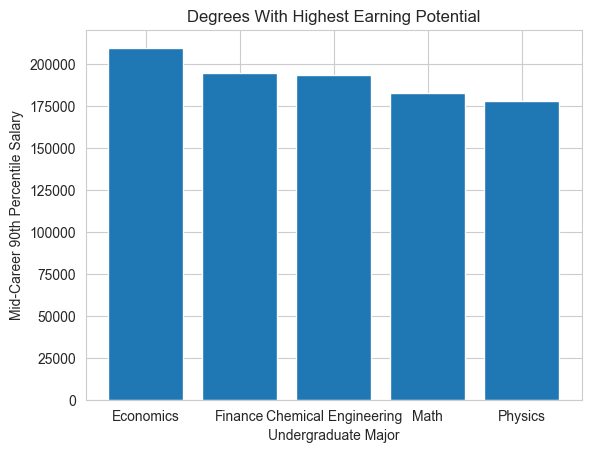

,Undergraduate Major,Mid-Career 90th Percentile Salary
17,Economics,210000.0
22,Finance,195000.0
8,Chemical Engineering,194000.0
37,Math,183000.0
44,Physics,178000.0


In [374]:
deg_highest_earning_pot = clean_df[['Undergraduate Major','Mid-Career 90th Percentile Salary']]
deg_highest_earning_pot_sorted= deg_highest_earning_pot.sort_values('Mid-Career 90th Percentile Salary', ascending=False).head(5)

x_values = deg_highest_earning_pot_sorted['Undergraduate Major']
y_values = deg_highest_earning_pot_sorted['Mid-Career 90th Percentile Salary']


plt.bar(x_values, y_values)

plt.title("Degrees With Highest Earning Potential")
plt.ylabel("Mid-Career 90th Percentile Salary")
plt.xlabel("Undergraduate Major")
plt.show()

deg_highest_earning_pot.sort_values('Mid-Career 90th Percentile Salary', ascending=False).head(5)

#### * Which degrees have the largest difference between high and low earners

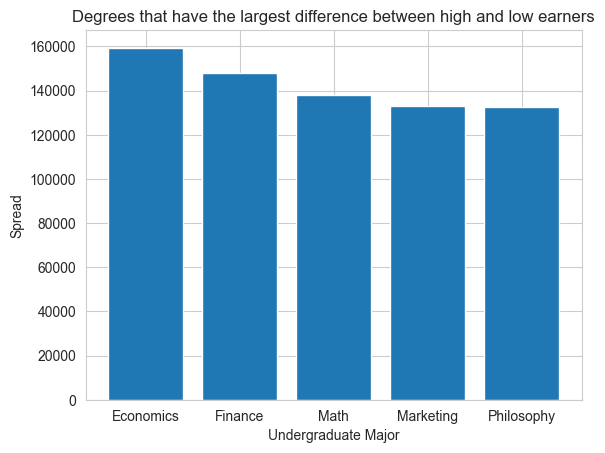

,Undergraduate Major,diff
17,Economics,159400.0
22,Finance,147800.0
37,Math,137800.0
36,Marketing,132900.0
42,Philosophy,132500.0


In [377]:
deg_highest_diff = clean_df[['Undergraduate Major','diff']]
deg_highest_diff_sorted = deg_highest_diff.sort_values('diff', ascending=False).head(5)


x_values = deg_highest_diff_sorted ['Undergraduate Major']
y_values = deg_highest_diff_sorted ['diff']


plt.bar(x_values, y_values)

plt.title("Degrees that have the largest difference between high and low earners")
plt.ylabel("Spread")
plt.xlabel("Undergraduate Major")
plt.show()

deg_highest_diff_sorted

## 4. What are the lowest risk college majors from an earnings standpoint?
A low-risk major is a degree where there is a small difference between the lowest and highest salaries. 

In [171]:
# clean_df['diff'] = clean_df['Mid-Career 90th Percentile Salary'] - clean_df['Mid-Career 10th Percentile Salary']
diff_col = clean_df['Mid-Career 90th Percentile Salary'] - clean_df['Mid-Career 10th Percentile Salary']
clean_df.insert(1, 'diff', diff_col)


In [177]:
# clean_df.sort_values('diff', ascending=True).head(10)
low_risk_majors =clean_df[['Undergraduate Major','diff']]

In [182]:
low_risk_majors.sort_values('diff', ascending=True).head(10)

,Undergraduate Major,diff
40,Nursing,50700.0
43,Physician Assistant,57600.0
41,Nutrition,65300.0
49,Spanish,65400.0
27,Health Care Administration,66400.0
47,Religion,66700.0
23,Forestry,70000.0
32,Interior Design,71300.0
18,Education,72700.0
15,Criminal Justice,74800.0


### 5. Do business, STEM (Science, Technology, Engineering, Mathematics) or HASS (Humanities, Arts, Social Science) degrees earn more on average?

In [224]:
clean_df.groupby('Group').mean().round(2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_29136\54097759.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_df.groupby('Group').mean().round(2)


,diff,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
Group,,,,,
Business,103958.33,44633.33,75083.33,43566.67,147525.00
HASS,95218.18,37186.36,62968.18,34145.45,129363.64
STEM,101600.00,53862.50,90812.50,56025.00,157625.00


In [382]:
group = clean_df.groupby('Group')
group['Mid-Career 90th Percentile Salary'].mean().sort_values(ascending=False).round(2).to_frame()



,Mid-Career 90th Percentile Salary
Group,
STEM,157625.00
Business,147525.00
HASS,129363.64


On the average STEM careers earn more.

## Using updated data from payscale.com 

In [290]:
from bs4 import BeautifulSoup
import requests

In [320]:
response = requests.get("https://www.payscale.com/college-salary-report/majors-that-pay-you-back/bachelors?orderBy=major&ascending=false")
payscale_url = response.text

soup2 = BeautifulSoup(payscale_url, "html.parser")
college_majors_sal = [tag.getText() for tag in soup2.find_all(name="span", class_="data-table__value")]


In [321]:
len(college_majors_sal)

150

In [322]:
num_cols = 6
data = [college_majors_sal[i:i+num_cols ] for i in range(0, len(college_majors_sal), num_cols )]

columns = ['Rank','Major', 'Degree Type', 'Early Career Pay', 'Mid-Career Pay','% High Meaning']

tdf = pd.DataFrame(data, columns=columns)
tdf =tdf.copy()

In [323]:
tdf.drop(columns=['Degree Type','% High Meaning']).sort_values('Early Career Pay', ascending=False)
# tdf.sort_values('Rank', ascending=True)

,Rank,Major,Early Career Pay,Mid-Career Pay
9,37,Welding Engineering,"$81,000","$126,600"
8,277,Welding Engineering Technology,"$74,700","$95,000"
3,472,Workforce Education & Development,"$59,900","$81,400"
10,203,Web Development,"$56,400","$101,300"
11,263,Web Design & Development,"$53,100","$95,900"
23,622,Turfgrass Management,"$53,100","$71,900"
24,447,Travel Industry Management,"$52,600","$82,900"
13,367,Web & Digital Media Development,"$52,300","$88,000"
21,319,Urban & Regional Planning,"$51,800","$92,100"
19,509,Urban Studies,"$51,500","$78,900"
